# CADlingo - Initial Setup

This notebook verifies that:
1. All dependencies are installed correctly
2. Project structure exists
3. Data loading functions
4. Data exploration

## 1. Import Dependencies & Verify Installation

In [1]:
# Check Python and package versions
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import torch
import ezdxf
print('Python:', sys.version)
print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Seaborn:', sns.__version__)
print('Torch:', torch.__version__)
print('ezdxf:', ezdxf.__version__)

Python: 3.11.14 (main, Oct  9 2025, 16:16:55) [Clang 17.0.0 (clang-1700.0.13.3)]
Numpy: 1.24.3
Pandas: 2.0.3
Matplotlib: 3.7.2
Seaborn: 0.12.2
Torch: 2.0.1
ezdxf: 1.0.3


## 2. Project Structure Verification

In [2]:
# List main project folders and files (check parent directory)
import os

base = os.path.abspath(os.path.join(os.getcwd(), '..'))
for name in ['data', 'src', 'notebooks', 'results', 'ui', 'README.md', 'requirements.txt']:
    path = os.path.join(base, name)
    print(f"{name}:", 'Exists' if os.path.exists(path) else 'Missing')

data: Exists
src: Exists
notebooks: Exists
results: Exists
ui: Exists
README.md: Exists
requirements.txt: Exists


## 3. Dataset Loading & Summary

In [5]:
import glob
import pickle
import pandas as pd
import os

# Get project root (parent of notebooks/)
base = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_path = os.path.join(base, 'data', 'raw', 'pickle', 'train', '*.pickle')
sample_files = glob.glob(data_path)

if sample_files:
    with open(sample_files[0], 'rb') as f:
        data = pickle.load(f)
    print('Sample keys:', list(data.keys()))
    # Show summary if possible
    if 'rooms' in data:
        print('Number of rooms:', len(data['rooms']))
        print('Room types:', set(r['type'] for r in data['rooms']))
else:
    print('No RPLAN pickle files found. Please run src/data/downloader.py to download.')

Sample keys: ['rooms']
Number of rooms: 3
Room types: {'bathroom', 'kitchen', 'bedroom'}


## 4. Early Data Exploration

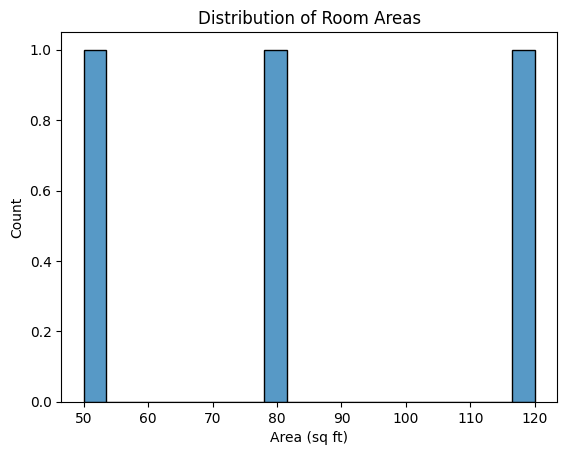

In [6]:
# If data loaded, show a simple plot (room areas)
import matplotlib.pyplot as plt
import seaborn as sns

if 'data' in locals() and 'rooms' in data:
    areas = [r['area'] for r in data['rooms'] if 'area' in r]
    sns.histplot(areas, bins=20)
    plt.title('Distribution of Room Areas')
    plt.xlabel('Area (sq ft)')
    plt.ylabel('Count')
    plt.show()
else:
    print('No room data available for plotting.')

## 5. Environment Verification Complete